In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import argparse as ap

from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from scipy.signal import find_peaks as fpeaks

plt.rc('text', usetex=True)

In [2]:
def open_data(filename):
    csv_data = np.genfromtxt(filename, dtype=int, delimiter=',')
    return csv_data

In [3]:
def calc_densities(lattice):
    x_size, y_size = lattice.shape
    #x_size = lattice.shape[0]
    
    a_pop = np.count_nonzero(lattice == 0, axis=0)
    b_pop = np.count_nonzero(lattice == 1, axis=0)
    c_pop = np.count_nonzero(lattice == 2, axis=0)
    pop = a_pop + b_pop + c_pop
    
    densities = np.vstack((a_pop, b_pop, c_pop, pop))
    # TODO:
    # -sum up populations
    # - divide by x_size
    return densities / (x_size * 1.0)

In [4]:
def calc_corr_function(lattice, spec, r_min, r_max, sub_d_squared):
    x_size, y_size = lattice.shape
    r_size = r_max - r_min
    r_range = range(r_min, r_max)
    densities = calc_densities(lattice)
    
    corr = np.zeros((r_size, y_size))
    for r in r_range:
        corr_r = np.zeros(y_size)
        for i in range(x_size):
            target_index = i + r
            if (target_index > 0):
                target_index = target_index % x_size
            corr_xr = (lattice[i,:] == spec) & (lattice[target_index,:] == spec)
            corr_r = corr_r + corr_xr.astype(int)
        r_ind = r - r_min
        
        if (sub_d_squared):
            np.put(corr[r_ind,:], range(r_size), (corr_r / (1.0 * x_size)) - (densities[spec,:]*densities[spec,:]))
        else:
            np.put(corr[r_ind,:], range(r_size), corr_r/(1.0 * x_size))
    
    return corr, r_range, densities

In [5]:
def calc_averages(prefix, t_min, t_max, spec, r_min, r_max, sub_d_squared=True, calc_avg_den=True, print_densities=False):
    fname = prefix + str(t_min) + ".csv"
    lattice = open_data(fname)
    avg_corr, r_range, avg_den = calc_corr_function(lattice, spec, r_min, r_max, sub_d_squared)
    if (print_densities):
        density_filename = "density_{0}.csv".format(t_min)
        np.savetxt(density_filename, avg_den, delimiter=',')
    for t in range(t_min + 1, t_max):
        print(t)
        fname = prefix + str(t) + ".csv"
        lattice = open_data(fname)
        corr_t, r_range, den_t = calc_corr_function(lattice, spec, r_min, r_max, sub_d_squared)
        
        if (calc_avg_den):
            avg_den = avg_den + den_t
        if (print_densities):
            density_filename = "density_{0}.csv".format(t)
            np.savetxt(density_filename, den_t, delimiter=',')
        
        avg_corr = avg_corr + corr_t
    
    avg_corr = avg_corr / ((t_max - t_min) * 1.0)
    
    if (calc_avg_den):
        avg_den = avg_den / ((t_max - t_min) * 1.0)
        return avg_corr, r_range, avg_den
    else:
        return avg_corr, r_range  

In [6]:
def find_roots(data, margin=1.0e-6, starting_idx=0, limit_idx=0):
    datasize = data.shape[-1]
    lim = limit_idx
    if ((starting_idx >= datasize - 2) or starting_idx < 0):
        raise ValueError("starting index of {} is invalid, must be between zero and length of array")
    if (limit_idx <= 0 or limit_idx<=starting_idx):
        lim = datasize
    
    for i in range(starting_idx + 1, lim):
        if ((data[i-1] > 0 and data[i] < 0) or (data[i-1] < 0 and data[i] > 0)):
            return i - 1
        if (abs(data[i]) < margin):
            return i
    raise RuntimeError("could not find a root within specified margin")

In [24]:
def calc_corr_lens(corr_function, max_r, write_output=False):
    correlation_lengths = np.zeros(max_r)
    for i in range(max_r):
        correlation_lengths[i] = find_roots(corr_avg.T[i,:])
    if write_output:
        np.savetxt("correlation_length.csv", correlation_lengths, delimiter=',')
    return correlation_lengths, np.arange(max_r)

In [7]:
os.chdir("data/dataRun_140420_0/rate_0/run_0")

In [8]:
os.getcwd()
#chdir("Research/Summer18Research/MonteCarloSim")

'/home/mlazarn/Research/Summer18Research/MonteCarloSim/data/dataRun_140420_0/rate_0/run_0'

In [11]:
prefix = "latt_"
min_t = 5000
max_t = min_t + 1024
species = 0
min_r = 0
max_r = 300

In [12]:
corr_avg, r_range, den_avg = calc_averages(prefix, min_t, max_t, species, min_r, max_r)
print(den_avg.shape)

5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200


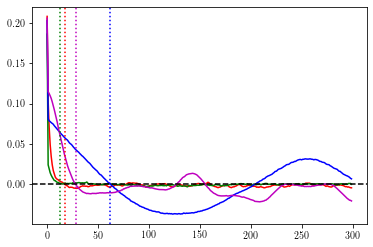

In [13]:
fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(r_range, corr_avg.T[32,:], label=r"y = 32", color='r')
ax1.plot(r_range, corr_avg.T[64,:], label=r"y = 64", color='g')
ax1.plot(r_range, corr_avg.T[80,:], label=r"y = 64", color='b')
ax1.plot(r_range, corr_avg.T[256,:], label=r"y = 256", color='m')

ax1.axvline(18, linestyle=':', color='r')
ax1.axvline(13, linestyle=':', color='g')
ax1.axvline(62, linestyle=':', color='b')
ax1.axvline(28, linestyle=':', color='m')

ax1.axhline(0, linestyle='--', color='k')

In [14]:
print(find_roots(corr_avg.T[32,:]))
print(find_roots(corr_avg.T[64,:]))
print(find_roots(corr_avg.T[80,:]))
print(find_roots(corr_avg.T[256,:]))

16
14
62
27


In [15]:
correlation_lengths = np.zeros(300)
for i in range(300):
    correlation_lengths[i] = find_roots(corr_avg.T[i,:])

In [25]:
corr_lens, y_range = calc_corr_lens(corr_avg, 300)

In [16]:
y_range = np.arange(den_avg.shape[-1])

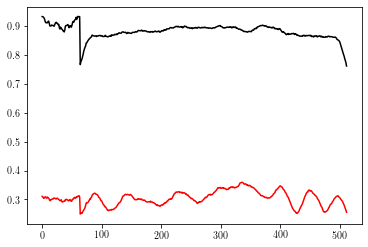

In [17]:
fig2, ax2 = plt.subplots(facecolor="white")
ax2.plot(y_range, den_avg[3], color='k')
ax2.plot(y_range, den_avg[0], color='r')

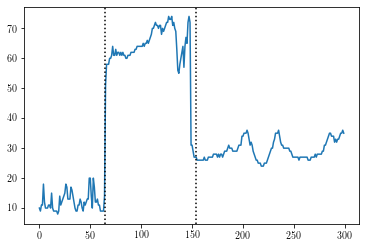

In [26]:
fig3, ax3 = plt.subplots(facecolor="white")
#ax3.plot(y_range, den_avg[3], color='k')
ax3.plot(corr_lens)
ax3.axvline(64, linestyle=':', color='k')
ax3.axvline(154, linestyle=':', color='k')

In [6]:
latt = open_data("data/dataRun_140420_0/rate_0/run_0/latt_5000.csv")

In [7]:
corr_0 = (latt[0,:] == 0) & (latt[-1,:] == 0)
corr_0.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [8]:
den = calc_densities(latt)

corr_a = np.zeros((511, y_size))
corr_a_subbed = np.zeros((511, y_size))
for r in range(-255, 256):
    corr_r = np.zeros(y_size)
    for i in range(x_size):
        target_index = i + r
        if (target_index > 0):
            target_index = target_index % x_size
        corr_xr = (latt[i,:] == 0) & (latt[target_index,:] == 0)
        corr_r = corr_r + corr_xr.astype(int)
    r_ind = r + 255
    np.put(corr_a[r_ind,:], range(512), corr_r/(1.0 * x_size))
    np.put(corr_a_subbed[r_ind,:], range(512), (corr_r / (1.0 * x_size)) - (den[0,:]*den[0,:]))

#a_pop = np.count_nonzero(latt == 0, axis=0)
#print((corr_a[0,:])

In [9]:
r = range(-255, 256)

fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(r, corr_a.T[32,:], label=r"y = 32")
ax1.plot(r, corr_a.T[64,:], label=r"y = 64")
ax1.plot(r, corr_a.T[256,:], label=r"y = 256")

ax1.axvline(20, linestyle='--', color='k')
#ax1.set_xlabel(r'$r$')
#ax1.set_ylabel(r'$C(r)$')

fig2, ax2 = plt.subplots(facecolor="white")
ax2.plot(r, corr_a_subbed.T[32,:], label=r"y = 32")
ax2.plot(r, corr_a_subbed.T[64,:], label=r"y = 64")
ax2.plot(r, corr_a_subbed.T[256,:], label=r"y = 256")

ax2.axvline(20, linestyle='--', color='k')
ax2.axhline(0, linestyle='--', color='k')
#ax1.set_xlabel(r'$r$')
#ax1.set_ylabel(r'$C(r)$')

corr_b, r, d = calc_corr_function(latt, 1, -255, 256, False)
corr_b_subbed  = calc_corr_function(latt, 1, -255, 256, True)[0]

corr_b.shape

fig3, ax3 = plt.subplots(facecolor="white")
ax3.plot(r, corr_b.T[32,:], label=r"y = 32")
ax3.plot(r, corr_b.T[64,:], label=r"y = 64")
ax3.plot(r, corr_b.T[256,:], label=r"y = 256")

ax3.axvline(20, linestyle='--', color='k')
ax3.set_xlabel(r'$r$')
ax3.set_ylabel(r'$C(r)$')

fig4, ax4 = plt.subplots(facecolor="white")
ax4.plot(r, corr_b_subbed.T[32,:], label=r"y = 32")
ax4.plot(r, corr_b_subbed.T[64,:], label=r"y = 64")
ax4.plot(r, corr_b_subbed.T[256,:], label=r"y = 256")

ax4.axvline(20, linestyle='--', color='k')
ax4.axhline(0, linestyle='--', color='k')
ax4.set_xlabel(r'$r$')
ax4.set_ylabel(r'$C(r)$')

In [21]:
min_r = 0
max_r = 300
corr_avg = np.zeros((max_r - min_r,512))
min_t = 5000
max_t = min_t + 1024
r_range = np.zeros(max_r - min_r)

size_t = max_t - min_t
prefix = "data/dataRun_140420_0/rate_0/run_0/latt_"
spec = 0

sub_d_squared = True

corr_avg.shape

(300, 512)

In [22]:
for t in range(min_t, max_t):
    print(t)
    fname = prefix + str(t) + ".csv"
    latt0 = open_data(fname)
    
    #den0 = calc_densities(latt0)
    
    corr_t, r_range, densities = calc_corr_function(latt0, spec, min_r, max_r, sub_d_squared)
    #print(corr_t.shape)
    #check = np.count_nonzero(corr_t.T[256,:] == corr_a_subbed[256,:])
    #corr_t = calc_corr_function(open_data(fname), den0, spec, r_min, r_max, sub_d_squared)[0]

    corr_avg = corr_avg + corr_t
    
corr_avg = corr_avg / (size_t * 1.0)
print(corr_avg.shape)

5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199


Text(0, 0.5, '$C(r)$')

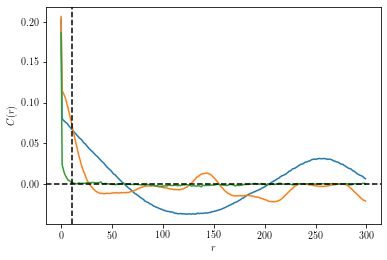

In [25]:
r = r_range
fig5, ax5 = plt.subplots(facecolor="white")
ax5.plot(r[:], corr_avg.T[80,:], label=r"y = 256")
ax5.plot(r[:], corr_avg.T[256,:], label=r"y = 32")
ax5.plot(r[:], corr_avg.T[64,:], label=r"y = 64")


ax5.axvline(11, linestyle='--', color='k')
ax5.axhline(0, linestyle='--', color='k')
ax5.set_xlabel(r'$r$')
ax5.set_ylabel(r'$C(r)$')

In [ ]:
print(r[25])

fig6, ax6 = plt.subplots(facecolor="white")
#ax6.plot(r, corr_b_subbed.T[256,:], label=r"y = 256")
#ax6.plot(r, corr_avg.T[256,:], label=r"y = 256")
ax6.plot(r, corr_diff.T[256,:], label=r"y = 256")

ax6.axhline(0, linestyle='--', color='k')


In [ ]:
corr_a0, r_range, d  = calc_corr_function(open_data(prefix + "5000.csv"), 0, -255, 256, True)
corr_a1  = calc_corr_function(open_data(prefix + "6000.csv"), 0, -255, 256, True)[0]
diff = np.abs(corr_a0 - corr_a1)

In [ ]:
fig7, ax7 = plt.subplots(facecolor="white")
#ax6.plot(r, corr_b_subbed.T[256,:], label=r"y = 256")
#ax6.plot(r, corr_avg.T[256,:], label=r"y = 256")
ax7.plot(r_range, diff.T[256,:], label=r"y = 256")
print(np.max(diff))
ax7.axhline(0, linestyle='--', color='k')